<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/PCVK_2024_19/blob/main/Week7_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**

https://github.com/MuhammadAinurRiziq13/PCVK_2024_19

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Konvolusi tanpa library

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
def convolution2d(image, kernel, stride, padding):
    h, w = image.shape
    kh, kw = kernel.shape

    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    padded_h, padded_w = image_padded.shape
    out_h = (padded_h - kh) // stride + 1
    out_w = (padded_w - kw) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image_padded[i*stride:i*stride+kh, j*stride:j*stride+kw]
            output[i, j] = np.sum(region * kernel)

    return output

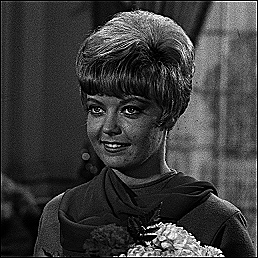

In [ ]:
img = cv.imread('/content/gdrive/MyDrive/pcvk/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Contoh Kernel sharpen
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Mengaplikasikan konvolusi
output = convolution2d(img_gray, kernel, 1, 2)
cv2_imshow(output)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

In [ ]:
# Kernel Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Kernel Emboss
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

# Kernel Left Sobel Edge Detection
lsed = np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])

# Kernel Canny Edge Detection
ced = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

# Kernel Prewitt Edge Detection
ped = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]])

# Kernel 5 x 5 Gaussian Blur
gaus5x5 = np.array([[1,  4,  6,  4,  1],
                    [4, 16, 24, 16,  4],
                    [6, 24, 36, 24,  6],
                    [4, 16, 24, 16,  4],
                    [1,  4,  6,  4,  1]]) / 256

# Kernel 21 x 21 Gaussian Blur
kernel_size = 21 # Ukuran kernel Gaussian

sigma = math.sqrt(kernel_size) # Hitung sigma (standar deviasi) berdasarkan ukuran kernel

gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma) # Dapatkan kernel Gaussian 1D menggunakan cv.getGaussianKernel

gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T # Buat kernel Gaussian 2D dengan mengalikan kernel 1D dengan transposenya

gaus21x21 = gaussian_kernel_2d

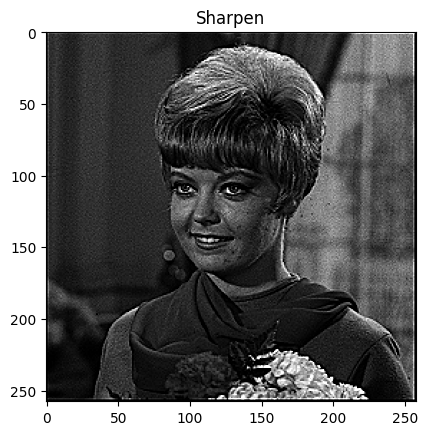

In [ ]:
# Aplikasikan konvolusi
output_sharpen = convolution2d(img_gray, sharpen, 1, 2)

# Tampilkan hasil
plt.imshow(output_sharpen, cmap='gray', vmin=0, vmax=255)
plt.title('Sharpen')
plt.show()

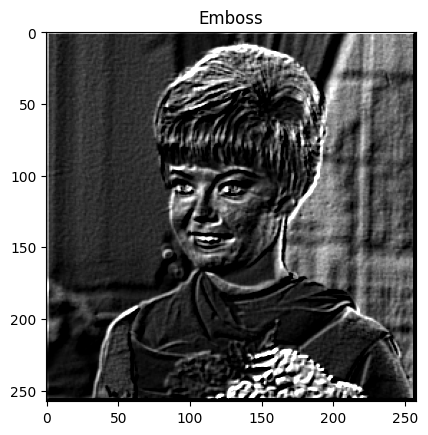

In [ ]:
output_emboss = convolution2d(img_gray, emboss, 1, 2)

# Tampilkan hasil
plt.imshow(output_emboss, cmap='gray', vmin=0, vmax=255)
plt.title('Emboss')
plt.show()

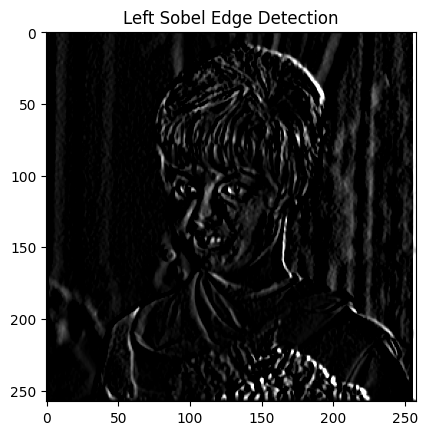

In [ ]:
output_lsed = convolution2d(img_gray, lsed, 1, 2)

# Tampilkan hasil
plt.imshow(output_lsed, cmap='gray', vmin=0, vmax=255)
plt.title('Left Sobel Edge Detection')
plt.show()

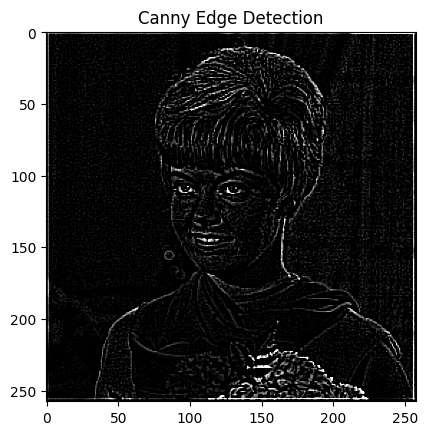

In [ ]:
output_ced = convolution2d(img_gray, ced, 1, 2)

# Tampilkan hasil
plt.imshow(output_ced, cmap='gray', vmin=0, vmax=255)
plt.title('Canny Edge Detection')
plt.show()

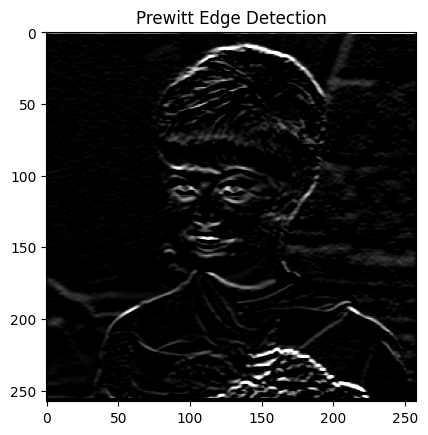

In [ ]:
output_ped = convolution2d(img_gray, ped, 1, 2)

# Tampilkan hasil
plt.imshow(output_ped, cmap='gray', vmin=0, vmax=255)
plt.title('Prewitt Edge Detection')
plt.show()

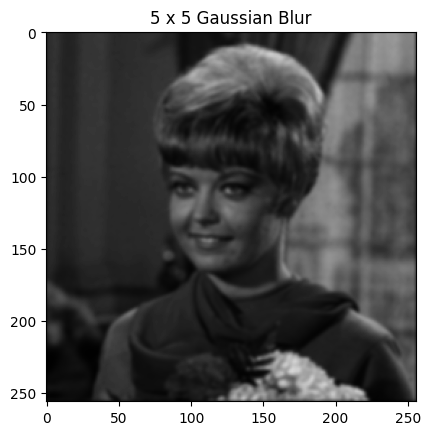

In [ ]:
output_gaus5x5 = convolution2d(img_gray, gaus5x5, 1, 2)

plt.imshow(output_gaus5x5, cmap='gray', vmin=0, vmax=255)
plt.title('5 x 5 Gaussian Blur')
plt.show()

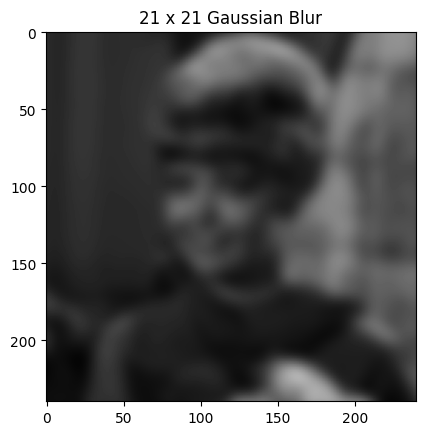

In [ ]:
output_gaus21x21 = convolution2d(img_gray, gaus21x21, 1, 2)

plt.imshow(output_gaus21x21, cmap='gray', vmin=0, vmax=255)
plt.title('21 x 21 Gaussian Blur')
plt.show()

### E. Tugas

Processing /content/gdrive/MyDrive/pcvk/ktp/ktp1.png


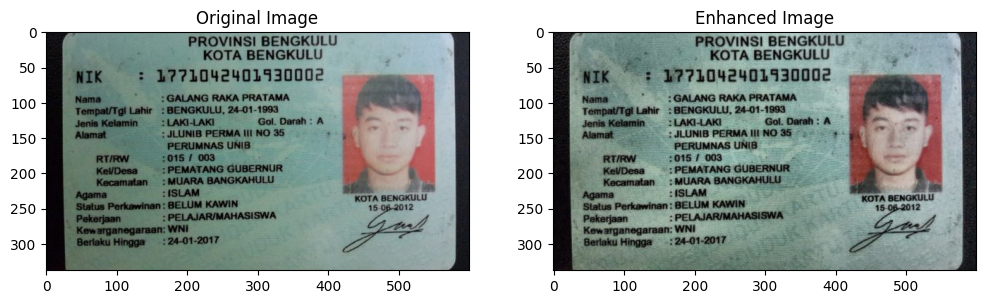

Processing /content/gdrive/MyDrive/pcvk/ktp/ktp2.png


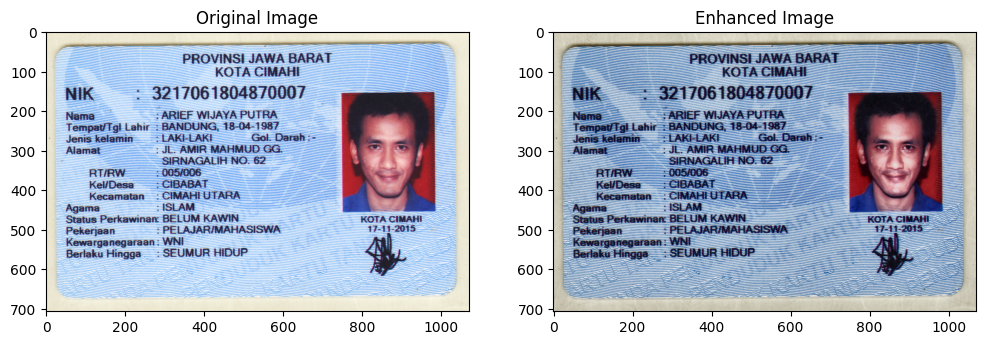

Processing /content/gdrive/MyDrive/pcvk/ktp/ktp3.png


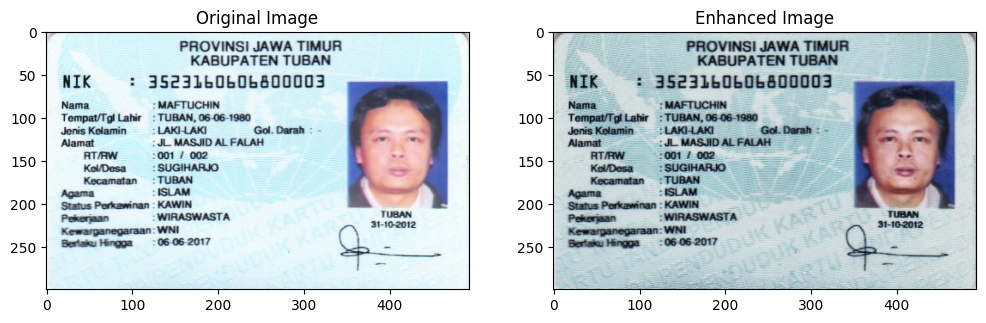

Processing /content/gdrive/MyDrive/pcvk/ktp/ktp4.png


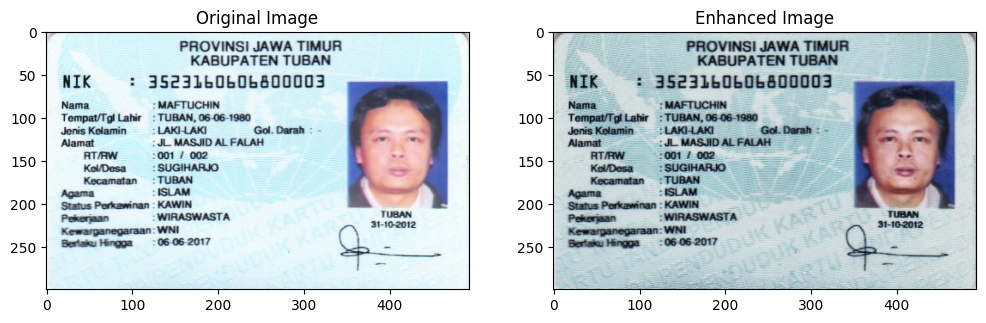

Processing /content/gdrive/MyDrive/pcvk/ktp/ktp5.png


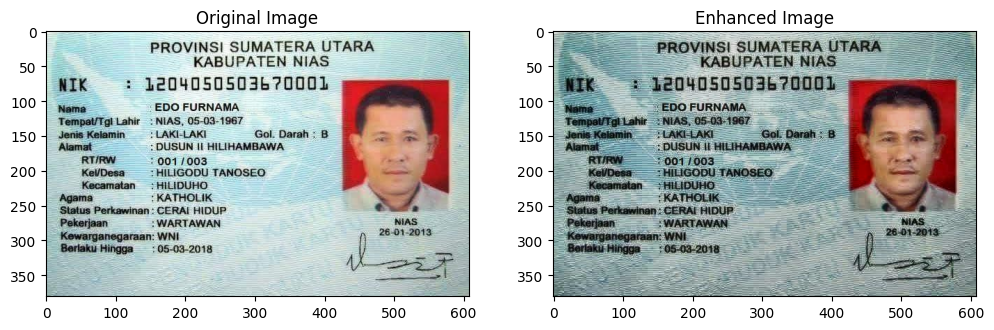

Processing /content/gdrive/MyDrive/pcvk/ktp/ktp6.png


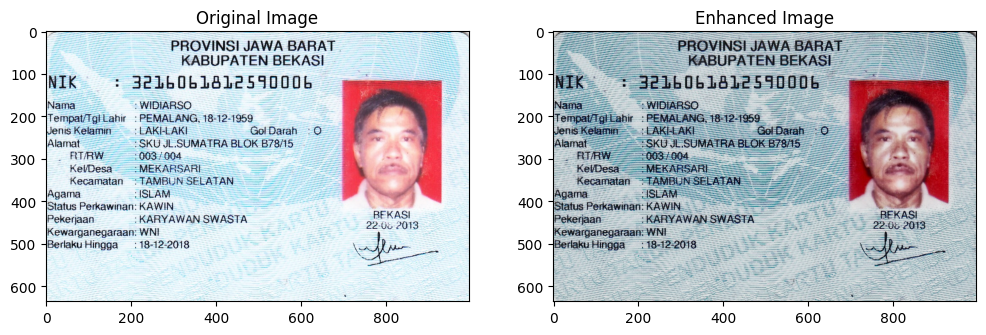

Processing /content/gdrive/MyDrive/pcvk/ktp/KTP7.jpeg


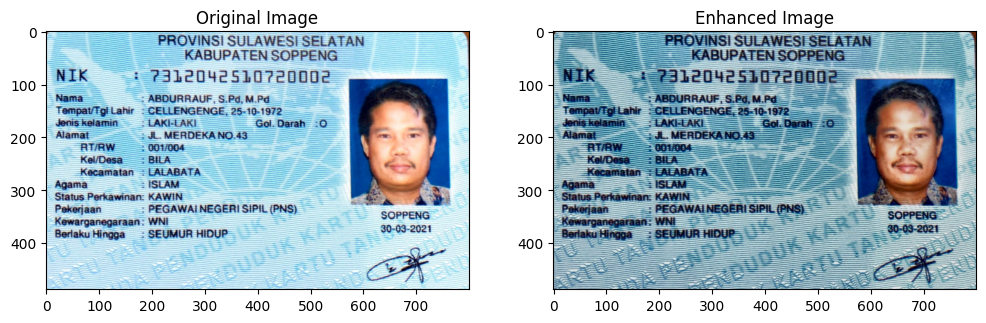

In [25]:
# Fungsi untuk melakukan filterisasi, deteksi, histogram equalization, dan operasi aritmatika
def process_image(image_path):
    # Membaca citra
    img = cv.imread(image_path)

    # Filterisasi menggunakan GaussianBlur
    blurred = cv.GaussianBlur(img, (21, 21), 0)

    # Deteksi tepi menggunakan Canny edge detection
    edges = cv.Canny(blurred, 150, 250)

    # Adaptive Histogram Equalization menggunakan CLAHE untuk meningkatkan kontras tanpa over-exposure
    img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    equalized = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)

    # Operasi aritmatika: tambahkan hasil equalized dengan deteksi tepi dengan perbandingan lebih halus
    enhanced = cv.addWeighted(equalized, 0.9, cv.cvtColor(edges, cv.COLOR_GRAY2BGR), 0.1, 0)

    # Tampilkan hasil citra sebelum dan sesudah pemrosesan
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))

    plt.show()

# Daftar nama file citra KTP
image_files = ['/content/gdrive/MyDrive/pcvk/ktp/ktp1.png', '/content/gdrive/MyDrive/pcvk/ktp/ktp2.png', '/content/gdrive/MyDrive/pcvk/ktp/ktp3.png',
               '/content/gdrive/MyDrive/pcvk/ktp/ktp4.png', '/content/gdrive/MyDrive/pcvk/ktp/ktp5.png', '/content/gdrive/MyDrive/pcvk/ktp/ktp6.png',
               '/content/gdrive/MyDrive/pcvk/ktp/KTP7.jpeg']

# Memproses setiap citra
for image in image_files:
    print(f"Processing {image}")
    process_image(image)